# ***Praktikum 2***

### Klasifikasi SVM Pada Data Citra

In [3]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60, download_if_missing=True)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Gerhard Schroeder']
1
(109, 62, 47)


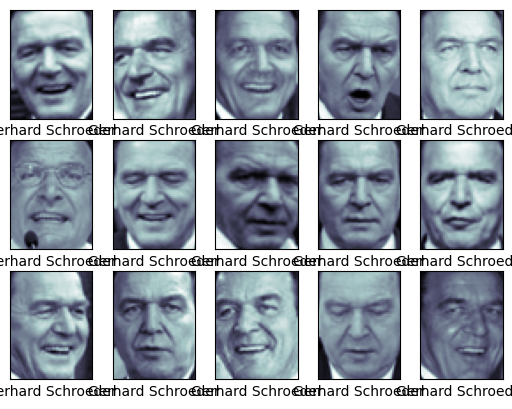

In [5]:
# contoh wajah yang digunakan
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [6]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [7]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [8]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

ValueError: 
All the 80 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "e:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\Anaconda\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\Anaconda\Lib\site-packages\sklearn\pipeline.py", line 416, in fit
    Xt = self._fit(X, y, **fit_params_steps)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\Anaconda\Lib\site-packages\sklearn\pipeline.py", line 370, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\Anaconda\Lib\site-packages\joblib\memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\Anaconda\Lib\site-packages\sklearn\pipeline.py", line 950, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\Anaconda\Lib\site-packages\sklearn\utils\_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\Anaconda\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\Anaconda\Lib\site-packages\sklearn\decomposition\_pca.py", line 460, in fit_transform
    U, S, Vt = self._fit(X)
               ^^^^^^^^^^^^
  File "e:\Anaconda\Lib\site-packages\sklearn\decomposition\_pca.py", line 510, in _fit
    return self._fit_full(X, n_components)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\Anaconda\Lib\site-packages\sklearn\decomposition\_pca.py", line 524, in _fit_full
    raise ValueError(
ValueError: n_components=150 must be between 0 and min(n_samples, n_features)=64 with svd_solver='full'

--------------------------------------------------------------------------------
64 fits failed with the following error:
Traceback (most recent call last):
  File "e:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\Anaconda\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\Anaconda\Lib\site-packages\sklearn\pipeline.py", line 416, in fit
    Xt = self._fit(X, y, **fit_params_steps)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\Anaconda\Lib\site-packages\sklearn\pipeline.py", line 370, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\Anaconda\Lib\site-packages\joblib\memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\Anaconda\Lib\site-packages\sklearn\pipeline.py", line 950, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\Anaconda\Lib\site-packages\sklearn\utils\_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\Anaconda\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\Anaconda\Lib\site-packages\sklearn\decomposition\_pca.py", line 460, in fit_transform
    U, S, Vt = self._fit(X)
               ^^^^^^^^^^^^
  File "e:\Anaconda\Lib\site-packages\sklearn\decomposition\_pca.py", line 510, in _fit
    return self._fit_full(X, n_components)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\Anaconda\Lib\site-packages\sklearn\decomposition\_pca.py", line 524, in _fit_full
    raise ValueError(
ValueError: n_components=150 must be between 0 and min(n_samples, n_features)=65 with svd_solver='full'


AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [9]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

NameError: name 'yfit' is not defined

In [12]:
# bentuk confusion matrix

import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

NameError: name 'yfit' is not defined